In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns       
import numpy as np
%matplotlib inline 

In [125]:
data = pd.read_csv("tmdb-movies.csv") #importing the dataset

In [126]:
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [127]:
data.shape

(10866, 21)

# Cleaning Data

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [129]:
#first sanity check - checking for duplicates
data.duplicated().sum()

1

In [130]:
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

In [131]:
#dropping unuseful columns
data.drop(columns=['id','imdb_id', 'homepage','overview'],inplace = True)

In [132]:
#checking for missing data
data.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
tagline                 2824
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [133]:
#filling the missing data
data['cast'] = data['cast'].fillna('missing')
data['director'].fillna('missing',inplace=True)
data['tagline'].fillna('missing',inplace=True)
data['keywords'].fillna('missing',inplace=True)
data['genres'].fillna('missing',inplace=True)
data['production_companies'].fillna('missing',inplace=True)  
#Adding the string 'missing' for all missing data with object as datatype

In [134]:
data.describe() #gives a statistical overview

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [135]:
data['budget'] = data['budget'].replace(0, np.NAN) 
# Although there is no null in budget, but we would find there is a problem when we calculate df['budget'].median()

# Visualization 

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'vote_average'}>],
       [<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>]], dtype=object)

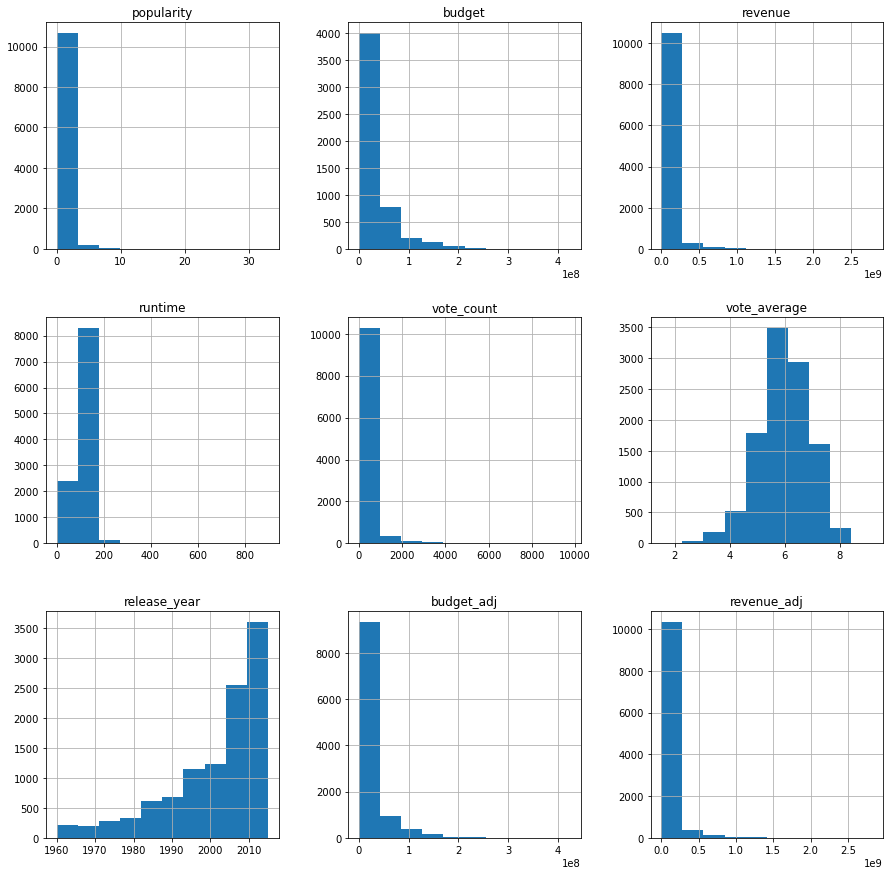

In [136]:
data.hist(figsize=(15,15))

Question 1. Does higher budget mean higher popularity ? Is there a coefficent relationship ?

Text(0, 0.5, 'Popularity')

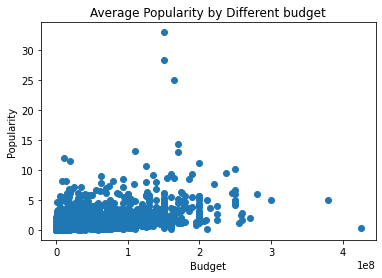

In [137]:
# plot the relation between budget and popularity 
x = data['budget']
y = data['popularity']

plt.scatter(x,y)
plt.title('Average Popularity by Different budget',fontsize=12)
plt.xlabel('Budget',fontsize=10)
plt.ylabel('Popularity',fontsize=10)

We can not see very strong relatioship between the budget and the popularity from above plot.

In [138]:
#creating two groups based on median value of budget
m = data['budget'].median()
low_budg =  data.query('budget < {}'.format(m))
high_budg =  data.query('budget >= {}'.format(m))

In [139]:
#check low budget and high budget mean values  
mean_popularity_of_low_budget = low_budg['popularity'].mean()
mean_popularity_of_high_budget = high_budg['popularity'].mean()

Text(0, 0.5, 'Popularity')

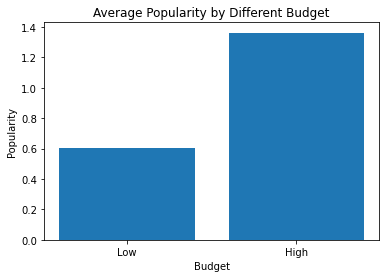

In [140]:
# create a bar chart with the values we get above 
locations = [1,2]
heights = [mean_popularity_of_low_budget,mean_popularity_of_high_budget]
labels = ['Low','High']
plt.bar(locations,heights,tick_label = labels)
plt.title('Average Popularity by Different Budget')
plt.xlabel('Budget')
plt.ylabel('Popularity')

In [141]:
increase_percentage = (mean_popularity_of_high_budget - mean_popularity_of_low_budget) / mean_popularity_of_high_budget * 100
increase_percentage

55.50933772947093

Conclusion: Movies with higher budget gain more than 50% popularity than low budget movies.

Question 2. What length will receive the highest popularity?

In [142]:
#Creating 3 groups with query().
short = data.query('runtime < 100') #movies less than 100 minutes
medium = data.query('runtime < 100' and 'runtime < 200')
long = data.query('runtime > 200')

In [143]:
# check mean popularity of different movie lengths 
mean_popularity_of_short = short['popularity'].mean()
mean_popularity_of_medium = medium['popularity'].mean()
mean_popularity_of_long = long['popularity'].mean()

Text(0, 0.5, 'Popularity')

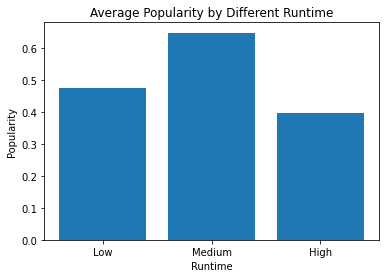

In [144]:
locations = [1,2,3]
heights = [mean_popularity_of_short, mean_popularity_of_medium, mean_popularity_of_long]
labels=['Low','Medium','High']
plt.bar(locations, heights, tick_label = labels)
plt.title('Average Popularity by Different Runtime')
plt.xlabel('Runtime')
plt.ylabel('Popularity')

Conclusion: The movies should not be too long or too short.Once the movies run over 200 minutes, it's hard for them to gain high popularity

Question 3. Does higher popularity means higher profits?

In [145]:
#getting the median of popularity
m_popularity = data['popularity'].median()
lower_popularity =  data.query('popularity < {}'.format(m_popularity))
higher_popularity =  data.query('popularity >= {}'.format(m_popularity))

In [146]:
# average net profit for low_popularity and high_popularity
mean_profit_of_low_popularity = lower_popularity['revenue'].mean()
mean_profit_of_high_popularity = higher_popularity['revenue'].mean()

Text(0, 0.5, 'Average Profit')

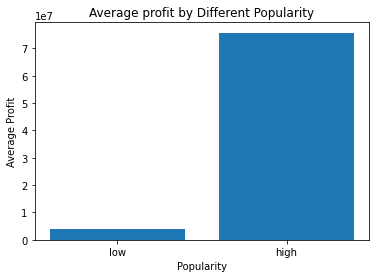

In [147]:
locations = [1,2]
heights = [mean_profit_of_low_popularity,mean_profit_of_high_popularity ]
labels=['low','high']
plt.bar(locations, heights, tick_label = labels)
plt.title('Average profit by Different Popularity')
plt.xlabel('Popularity')
plt.ylabel('Average Profit')

Conclusion:  Popular movies does make much higher average profits

Question 4.  Which genres are most popular from year to year?

In [148]:
#The following function can give all the counts for per category 
def extract_data(column_name):
    gen = data[column_name].str.cat(sep = '|') # put all the genres into a long string  
    # Create pandas series and store the values separately
    gen = pd.Series(gen.split('|'))   # split the genres by |
    # Display value count in descending order
    count = gen.value_counts(ascending = False) # count the occurrence of each genres 
    return count

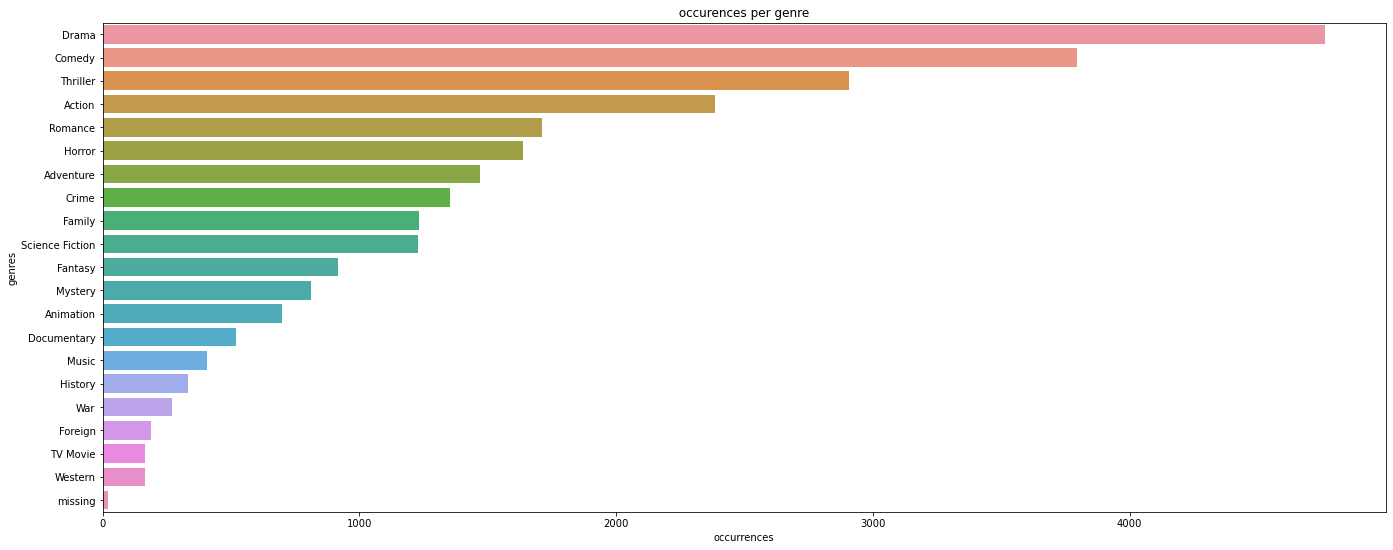

In [149]:
# use the function created above to split genres and count the occurrence of each one
genre_count = extract_data('genres')

#create a separate dataframe to plot
df_genre_counts = pd.DataFrame({'genres': genre_count.index, 'count': genre_count.values }) 
#df_genre_counts

f, ax = plt.subplots(figsize=(23, 9))
# use the dataframe just created as the input data 
sns.barplot(x = 'count', y = 'genres', data=df_genre_counts) # how to get the data is the key 
ax.set_title(' occurences per genre ')
ax.set_xlabel('occurrences')
ax.set_ylabel('genres')
plt.show()

Text(0, 0.5, 'number of movies')

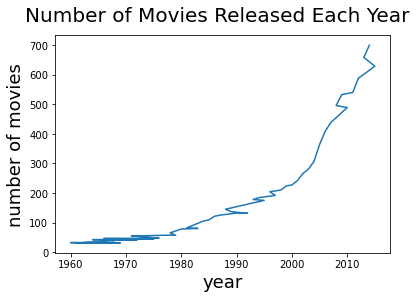

In [152]:
movie_count = data['release_year'].value_counts()
fig = plt.figure()
plt.plot(movie_count)
fig.suptitle('Number of Movies Released Each Year',fontsize=20)
plt.xlabel('year',fontsize=18)
plt.ylabel('number of movies',fontsize=18)

Conclusion: The top 5 genres are Drama, Comedy, Action, Horror and Thriller